In [17]:
import pandas as pd
import numpy as np
df=pd.read_csv("H:/Download1/archive/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.replace(" ",np.nan,inplace=True)
df.drop("customerID",axis=1,inplace=True)
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")
df["TotalCharges"]=df["TotalCharges"].fillna(df["TotalCharges"].mean())
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Churn"]=le.fit_transform(df["Churn"])
df=pd.get_dummies(df,drop_first=True)

Run


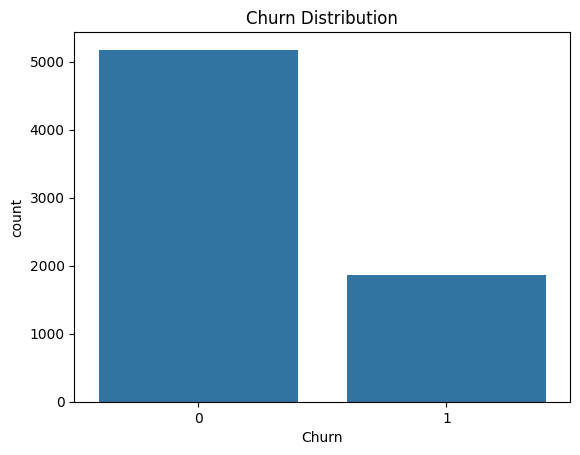

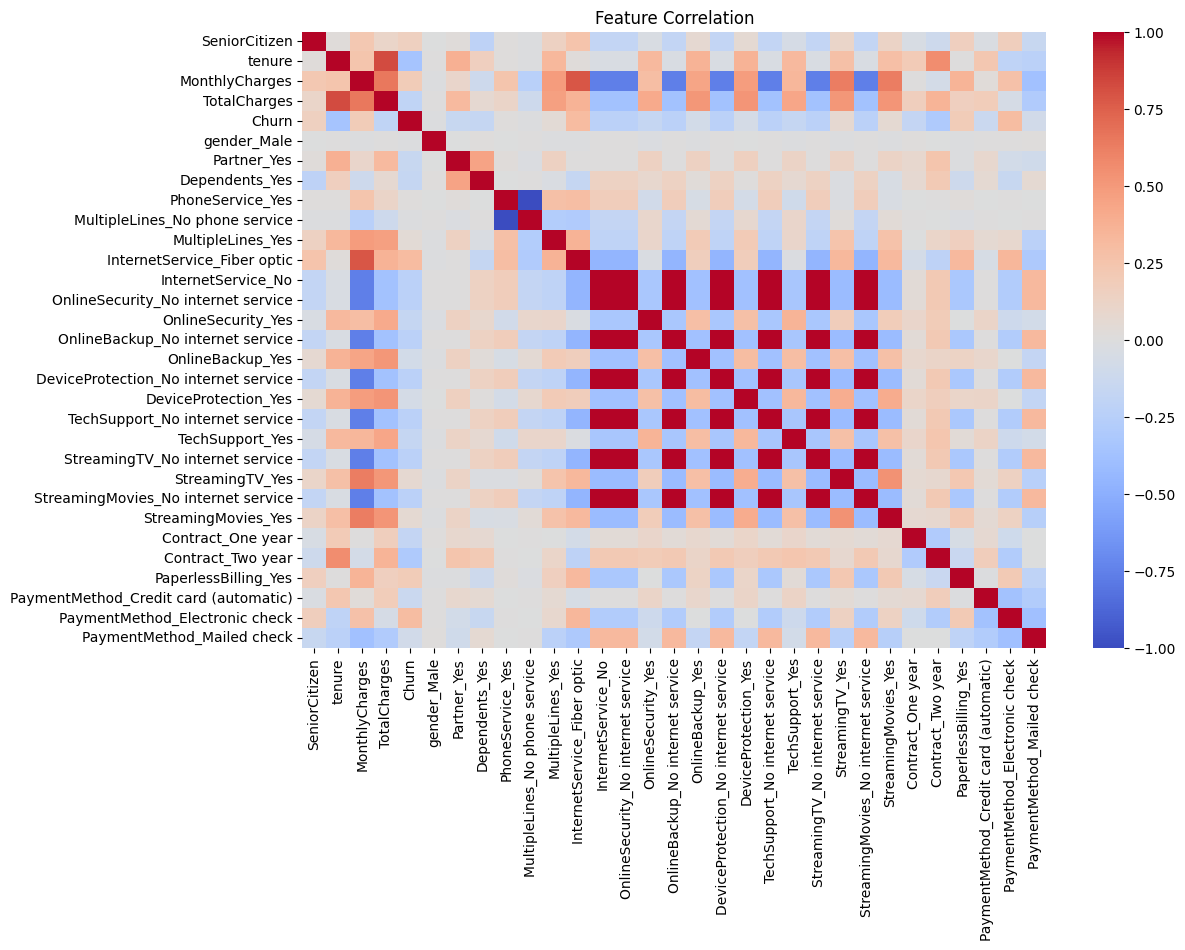

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Churn',data=df)
plt.title('Churn Distribution')
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap="coolwarm",annot=False)
plt.title('Feature Correlation')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
X=df.drop("Churn",axis=1)
y=df["Churn"]
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2,random_state=42)
#logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report
lr=LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
lr_pred=lr.predict_proba(X_test)[:,1]
print("Logistic Regression AUC:", roc_auc_score(y_test,lr_pred))

Logistic Regression AUC: 0.8621903692279026


In [39]:
#random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred=rf.predict_proba(X_test)[:,1]
print("Random Forest AUC:", roc_auc_score(y_test,rf_pred))

Random Forest AUC: 0.8385236059498793


In [41]:
import xgboost as xgb
xgb_model=xgb.XGBClassifier(use_label_encoder=False, eval_matric='logloss')
xgb_model.fit(X_train,y_train)
xgb_pred=xgb_model.predict_proba(X_test)[:,1]
print("XGBoost AUC:", roc_auc_score(y_test,xgb_pred))

C:\Users\sunny\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:15:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "eval_matric", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost AUC: 0.841200689391038


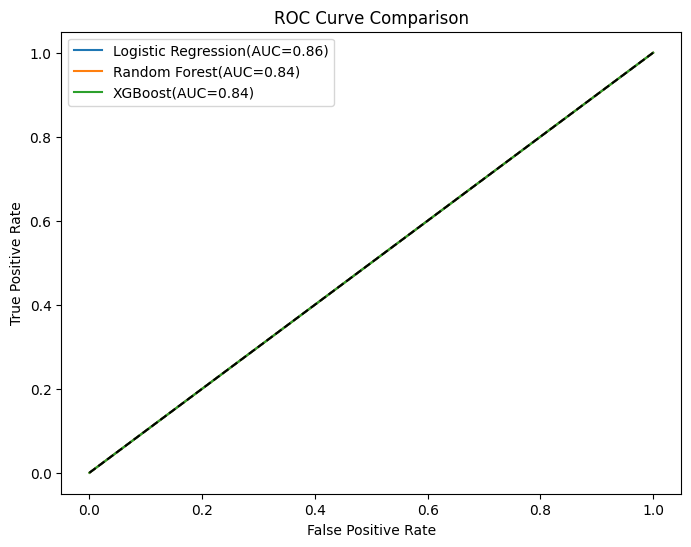

In [42]:
def plot_roc(model_name, y_true,y_score):
    fpr,tpr,_=roc_curve(y_true,y_score)
    plt.plot(fpr,fpr,label=f'{model_name}(AUC={roc_auc_score(y_true,y_score):.2f})')
plt.figure(figsize=(8,6))
plot_roc("Logistic Regression", y_test, lr_pred)
plot_roc("Random Forest", y_test, rf_pred)
plot_roc("XGBoost", y_test, xgb_pred)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [43]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f"--- {name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("AUC Score:", roc_auc_score(y_true, y_prob))

evaluate_model("Logistic Regression", y_test, lr.predict(X_test), lr_pred)
evaluate_model("Random Forest", y_test, rf.predict(X_test), rf_pred)
evaluate_model("XGBoost", y_test, xgb_model.predict(X_test), xgb_pred)


--- Logistic Regression ---
Confusion Matrix:
 [[934 102]
 [150 223]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.69      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

AUC Score: 0.8621903692279026
--- Random Forest ---
Confusion Matrix:
 [[944  92]
 [202 171]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

AUC Score: 0.8385236059498793
--- XGBoost ---
Confusion Matrix:
 [[922 114]
 [174 199]]
Classification Report:
               precisio